#Question 1.1 (3.1)

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer
np.random.seed(1000)

In [ ]:
# (a)
y_value=[]
k_value=[]
for k in range(0,1000):
  y1=(1+0.005)**(-2**k)
  y_value.append(y1)
  k_value.append(k)

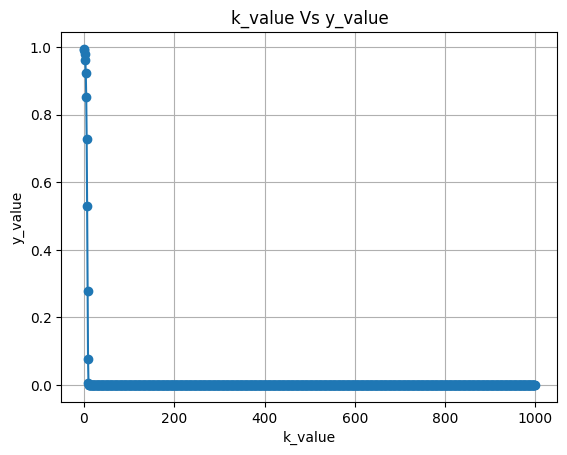

In [ ]:
#ploting the graph
plt.plot(k_value, y_value, marker='o')
plt.title('k_value Vs y_value')
plt.xlabel('k_value')
plt.ylabel('y_value')
plt.grid('True')
plt.show()

**Observation:** Here we see that the  value of the k is increase then  then the y value decerease and after k increase then y value converges to 0.

In [ ]:
# (b)
y_value=[]
k_value=[]
for k in range(0,1000):
  y1=1+(0.005)**(k)
  y_value.append(y1)
  k_value.append(k)

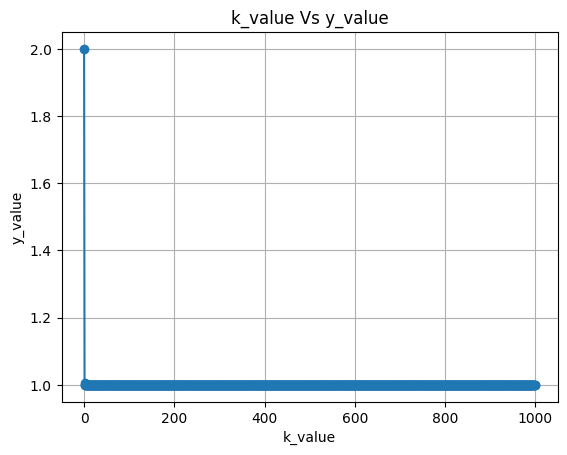

In [ ]:
#ploting the graph
plt.plot(k_value, y_value, marker='o')
plt.title('k_value Vs y_value')
plt.xlabel('k_value')
plt.ylabel('y_value')
plt.grid('True')
plt.show()

**Observation:** Here we see that the  value of the k is increase then  then the y value decerease and after k increase then y value converges to 1.

In [ ]:
# (c)
y_value=[]
k_value=[]
for k in range(0,100):
  y1=1+(0.005)**(-k)
  y_value.append(y1)
  k_value.append(k)

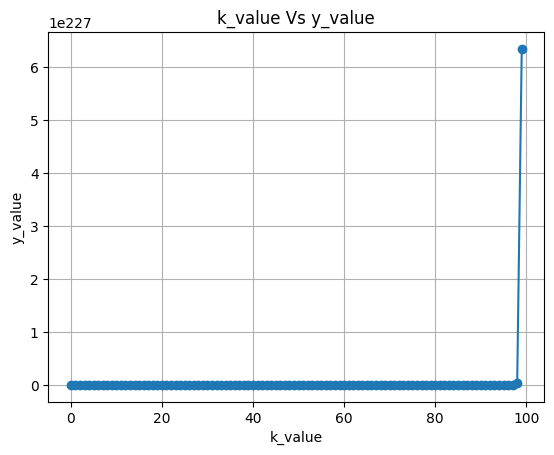

In [ ]:
#ploting the graph
plt.plot(k_value, y_value, marker='o')
plt.title('k_value Vs y_value')
plt.xlabel('k_value')
plt.ylabel('y_value')
plt.grid('True')
plt.show()

**Observation:** Here we see that the  value of y is the cobnstsant at the valu k increase at less than 100 at 100 the value of y automatically vary large

In [ ]:
# (d)
y_value=[]
k_value=[]
for k in range(0,100):
  y1=1+(k)**(-k)
  y_value.append(y1)
  k_value.append(k)

In [ ]:
#ploting the graph
plt.plot(k_value, y_value, marker='o')
plt.title('k_value Vs y_value')
plt.xlabel('k_value')
plt.ylabel('y_value')
plt.grid('True')
plt.show()

**Observation:** Here we see that the  value of the k is increase then  then the y value decerease and after k increase then y value converges to 1.

#Question 1.2 (3.2)

In [ ]:
A=np.random.randn(1000,10)

In [ ]:
epi=np.random.randn(1000,1)  #epi= episolon

In [ ]:
x=[]
for i in range(1,11):
  if i%2==0:  #even nunber
    x.append(np.random.uniform(i,i+1))
  if i%2!=0:  # odd number
    x.append(np.random.uniform(-i-1,-i))
print(x)

[-1.3110640391894186, 2.0953556890560354, -3.48254756209972, 4.8415435884555835, -5.6226295616803705, 6.016907413054009, -7.178645740421875, 8.400832193376997, -9.84136848040635, 10.37311927468738]


In [ ]:
x_bar=np.array(x)  #total even and the odd value
x_bar=x_bar.reshape(10,1)

In [ ]:
x_bar.shape
print(x_bar)

[[-1.31106404]
 [ 2.09535569]
 [-3.48254756]
 [ 4.84154359]
 [-5.62262956]
 [ 6.01690741]
 [-7.17864574]
 [ 8.40083219]
 [-9.84136848]
 [10.37311927]]


In [ ]:
A_x=A@x_bar   #find the A*x_bar

In [ ]:
np.matmul(A,x_bar).shape

(1000, 1)

In [ ]:
y=A_x+epi   #epi= episolon

In [ ]:
#y

In [ ]:
y.shape

(1000, 1)

#Question 1.3

In [ ]:
def evalf(x,n):  #function
  assert type(x) is np.ndarray and  len(x)==n
  f_val=np.linalg.norm(A@x - y)  #taking the norm
  f_val=f_val**(2)
  f_val=(0.5)*f_val
  return f_val

In [ ]:
x=np.array([0 for i in range(10)])
evalf(x,10)

246613513.7024423

In [ ]:
def evalg(x,n):  #gradient
  assert type(x) is np.ndarray
  assert len(x) == n
  return A.T@ (np.matmul(A, x) - y)

In [ ]:
evalg(x,10).shape

(10, 1000)

In [ ]:
def evalh(x,n):  #hussian
  assert type(x) is np.ndarray
  assert len(x) == n
  return A.T @ A

In [ ]:
BACKTRACKING_LINE_SEARCH = 1

In [ ]:
def compute_B_k(pr, y, B_k, n):  #compute the b_k
  assert type(pr) is np.ndarray and len(pr) == n
  assert type(B_k) is np.ndarray and len(y) == n
  mu = 1 / np.dot(np.squeeze(np.asarray(y)), np.squeeze(np.asarray(pr)))
  I = np.identity(n)
  a_1 = np.outer(np.multiply(mu, pr), y.T)
  a_2 = np.outer(np.multiply(mu, y), pr.T)
  b_k = np.add(np.matmul(np.matmul(I - a_1, B_k), I - a_2), np.outer(np.multiply(mu, pr), pr.T) )
  return b_k

In [ ]:
def compute_D_k(x,n):  #compute the dk
  assert type(x) is np.ndarray and len(x) == n
  if np.linalg.det(evalh(x,n)) == 0:
    raise ValueError('Determinant of Hessian is zero')
  return np.linalg.inv(evalh(x,n))

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma, B_k):
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  n = len(x)
  alpha = alpha_start
  p = - gradf
  D_k = B_k
  while evalf(x + alpha*np.matmul(D_k,p), n) > evalf(x, n) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha

In [ ]:
def find_minimizer_Newton(start_x, n, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == n
  assert type(tol) is float and tol>=0

  x = start_x
  g_x = evalg(x,n)
  h_x = evalh(x,n)
  x_iter = []
  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  step_length = 1.0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x, n))
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha, rho, gamma, D_k)

    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    x_iter.append(x)
    k += 1 #increment iteration
    g_x = evalg(x, n) #compute gradient at new point
  return x, x_iter,k,np.linalg.norm(g_x)

In [ ]:
n = 10 # number of the feature
my_start_x = np.array([0 for i in range(10)])
my_start_x = my_start_x.reshape(10,1)
my_tol  = 1e-4
alpha =0.99
rho=0.5
gamma=0.5

xk_x = []
f_arr = []
t=[]
print("For Newton's Method : ")
time1 = timer()
x_star_newton , x_k,k,norm = find_minimizer_Newton(my_start_x, 10, my_tol, BACKTRACKING_LINE_SEARCH, alpha , rho, gamma)
time2 = timer()
for i in range(len(x_k)-1):
  xk_x.append(math.log(np.linalg.norm(x_k[i] - x_star_newton)))
  t.append(x_k[i] - x_star_newton)
  f_arr.append(math.log(np.linalg.norm(evalf(x_k[i],n) - evalf(x_star_newton,n))))
print("x_star:", x_star_newton, "\nx_bar:", x_bar)
print("f_star:", evalf(x_star_newton,n), "\nf_bar:", evalf(x_bar,n))
print("Time taken by Newton's method: ", time2-time1)
print('number of iteration taken by algorithm is',k)
print('gradient norm is ',norm)

For Newton's Method : 
x_star: [[-1.33706955]
 [ 2.05737774]
 [-3.5326818 ]
 [ 4.89768406]
 [-5.64034443]
 [ 5.9987234 ]
 [-7.21067735]
 [ 8.43500087]
 [-9.88364086]
 [10.31156594]] 
x_bar: [[-1.31106404]
 [ 2.09535569]
 [-3.48254756]
 [ 4.84154359]
 [-5.62262956]
 [ 6.01690741]
 [-7.17864574]
 [ 8.40083219]
 [-9.84136848]
 [10.37311927]]
f_star: 492.20221882585076 
f_bar: 500.52408783388853
Time taken by Newton's method:  0.009767014999852108
number of iteration taken by algorithm is 5
gradient norm is  2.3599493363824433e-06


In [ ]:
for i in range(3):
  print(np.linalg.norm(t[i+1])/np.linalg.norm(t[i]))

0.009999990099999048
0.009999009998861393
0.009900990072111638


In [ ]:
evalf(x_star_newton,n)

492.20221882585076

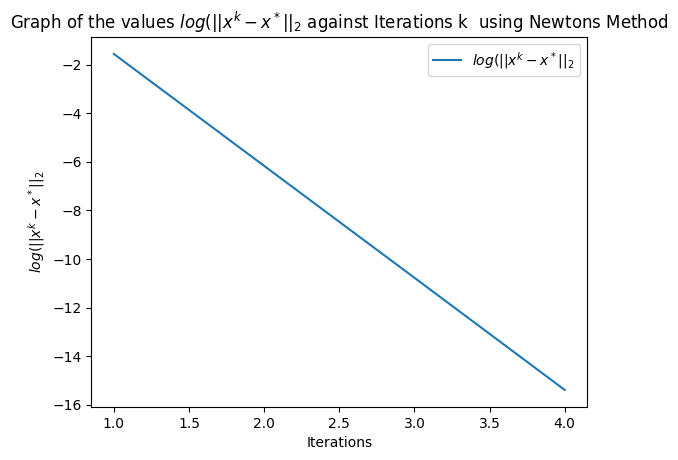

In [ ]:
#make the plot iteration vs log(.) function
plt.plot([i+1 for i in np.arange(len(xk_x))], xk_x,label=r'$ $')
plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k  using Newtons Method')
plt.xlabel('Iterations')
plt.ylabel(r'$log(||x^k - x^*||_2$')
plt.legend(['$log(||x^k - x^*||_2$'])
plt.show()

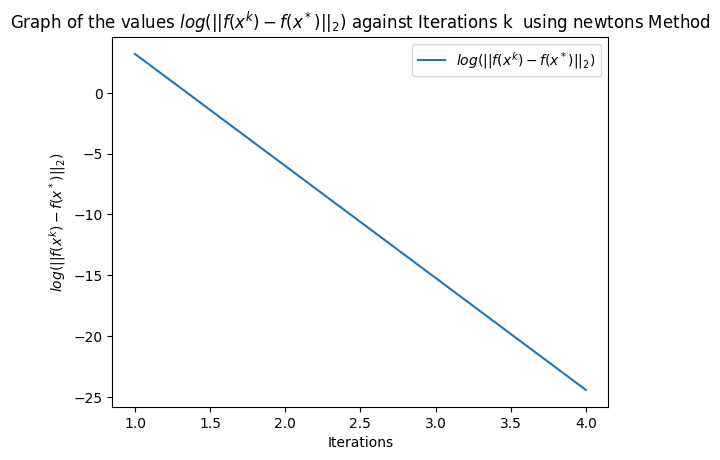

In [ ]:
#make the plot iterations and the log(f(.))
plt.plot([i+1 for i in np.arange(len(f_arr))], f_arr,label=r'$ $')
plt.title(r'Graph of the values $log(||f(x^k) - f(x^*)||_2)$ against Iterations k  using newtons Method')
plt.xlabel(r'Iterations')
plt.ylabel(r'$log(||f(x^k) - f(x^*)||_2)$')
plt.legend([r'$log(||f(x^k) - f(x^*)||_2)$'])
plt.show()

In [ ]:
1/np.linalg.norm(t[-1])  #23n0464

4829517.091893439


The condition of Q-Linear is :$\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}\leq r$, Where $r\in(0,1)$

taking log both side, we get
$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq log(r)$$


Since $r\in (0,1)$

hence $log(r)< 0$

Hence the condition of Q-Linear becomes:

$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2) < 0$$

From the above plots, we can observe that:

$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)$ is negative. since in each iteration $log(||x^{k+1} - x^*||_2)$ decreases  

but $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} \approx 1 \ \ \forall k\ge4
$


Hence, we can say that the Convergence of the function is  Q-Linear.

now let's check for Q-superlinear i.e. $ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}$

here after 4 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change  \ \ \forall \ \  k \ge 4$

$ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} = 1 \\ \Rightarrow \ \ it  \ \ is \ \ not \ \ Q-superlinear$

let's check for Q-quadratic

 $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2}$

 since after 4 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change \ \ \forall \ \  k \ge 4 $

  $ \Rightarrow \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \approx  \frac{1}{||x^{k} - x^*||_2}$

  $\Rightarrow  \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \le M \ \  \forall  \ \ k  \ \ sufficiently \ \ large    \\ since \frac{1}{||x^{k} - x^*||_2} \ \ is \ \ increasing \ \  as \ \  k  \ \ increases   \\ \Rightarrow \ \  it \ \  is \ \ not \ \   Q-quadratic$



objective function value is 504.5963652036184



# **Question 1.4**

In [ ]:
def find_minimizer_BFGS_scaling(start_x, n, tol, line_search_type, *args):

  assert type(start_x) is np.ndarray and len(start_x) == n
  assert type(tol) is float and tol>=0

  x = start_x
  g_x = evalg(x,n)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  B_k = np.identity(n)
  x_prev = x
  x_itr = []
  while (np.linalg.norm(g_x) > tol):
    step_length = compute_steplength_backtracking_scaled_direction(x_prev, g_x, alpha, rho, gamma, B_k)
    x_new = np.subtract(x_prev, np.multiply(step_length, np.matmul(B_k,g_x)))
    g_x = evalg(x_new,n)
    s = np.subtract(x_new, x_prev)
    y = np.subtract(evalg(x_new,n), evalg(x_prev,n))
    B_k = compute_B_k(s, y, B_k, n)
    x_prev = x_new
    k += 1
    x_itr.append(x_new)
  return x_new,x_itr

In [ ]:
n=10
x_start=np.array([0 for i in range(10)]).reshape(10,1)
alpha_start=0.99
rho=0.5
gamma=0.5
my_tol= 1e-6
x_bfgs = []
f_bfgs = []
t=[]
print("BFGS Method optimizers: ")
time1_bfgs = timer()
x_star_bfgs,x_k1 = find_minimizer_BFGS_scaling(x_start, n, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
time2_bfgs = timer()
print("x_star:", x_star_bfgs, "\nx_bar:", x_bar)
print("f_star:", evalf(x_star_bfgs,n), "\nf_bar:", evalf(x_bar,n))
print('23n0464')
print("Time taken by BFGS: ", time2_bfgs - time1_bfgs)
for i in range(len(x_k1)-1):
  x_bfgs.append(math.log(np.linalg.norm(x_k1[i] - x_star_bfgs)))
  t.append(x_k1[i] - x_star_bfgs)
  f_bfgs.append(math.log(np.linalg.norm(evalf(x_k1[i],n) - evalf(x_star_bfgs,n))))


BFGS Method optimizers: 
x_star: [[-1.33706955]
 [ 2.05737774]
 [-3.5326818 ]
 [ 4.89768406]
 [-5.64034443]
 [ 5.9987234 ]
 [-7.21067735]
 [ 8.43500087]
 [-9.88364087]
 [10.31156594]] 
x_bar: [[-1.31106404]
 [ 2.09535569]
 [-3.48254756]
 [ 4.84154359]
 [-5.62262956]
 [ 6.01690741]
 [-7.17864574]
 [ 8.40083219]
 [-9.84136848]
 [10.37311927]]
f_star: 492.20221882585065 
f_bar: 500.52408783388853
23n0464
Time taken by BFGS:  0.01979590900009498


In [ ]:
#plot the graph using the BFGS
plt.plot([i+1 for i in np.arange(len(x_bfgs))], x_bfgs,label=r'$ $')
plt.title('Graph of the values $log(||x^k - x^*||_2$ against Iterations k using BFGS Method')
plt.xlabel('Iterations')
plt.ylabel('$log(||x^k - x^*||_2$')
plt.legend([r'$log(||x^k - x^*||_2$'])
plt.show()

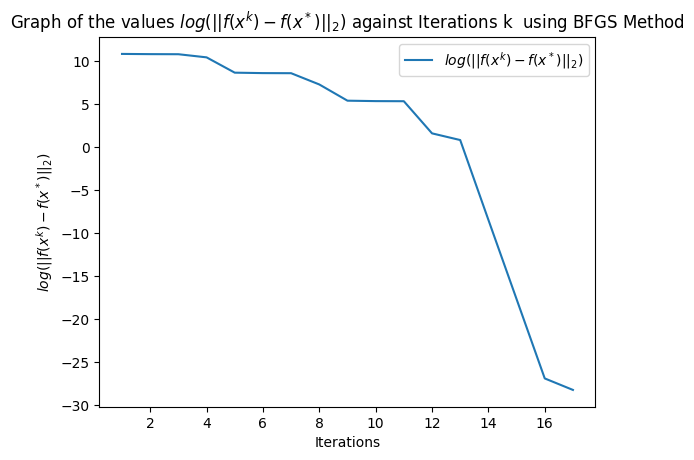

In [ ]:
#make the plot of the BFGS of the logf(.)
plt.plot([i+1 for i in np.arange(len(f_bfgs))], f_bfgs,label=r'$ $')
plt.title(r'Graph of the values $log(||f(x^k) - f(x^*)||_2)$ against Iterations k  using BFGS Method')
plt.xlabel(r'Iterations')
plt.ylabel(r'$log(||f(x^k) - f(x^*)||_2)$')
plt.legend([r'$log(||f(x^k) - f(x^*)||_2)$'])
plt.show()

In [ ]:
evalf(x_star_bfgs,n)  #now the function value at the x_star

492.20221882585065

In [ ]:
for i in range(15):
  print(np.linalg.norm(t[i+1])/np.linalg.norm(t[i]))

0.9762274821450817
0.9953277368798051
0.845976418178706
0.4060359088047774
0.9731767184228843
0.9948018362865905
0.5458805606035879
0.37792277394349716
0.9681730935781557
0.9940052168103668
0.15668913089956918
0.675281166059689
0.009721609917073222
0.00999938954670812
0.009950002147766304



The condition of Q-Linear is :$\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}\leq r$, Where $r\in(0,1)$

taking log both side, we get
$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq log(r)$$


Since $r\in (0,1)$

hence $log(r)< 0$

Hence the condition of Q-Linear becomes:

$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2) < 0$$

From the above plots, we can observe that:

$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)$ is negative. since in each iteration $log(||x^{k+1} - x^*||_2)$ decreases  

but $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} \approx 1 \ \ \forall k\ge 15
$


Hence, we can say that the Convergence of the function is  Q-Linear.

now let's check for Q-superlinear i.e. $ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}$

here after 15 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change  \ \ \forall \ \  k \ge 15$

$ lim_{k -> \infty}\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2} = 1 \\ \Rightarrow \ \ it  \ \ is \ \ not \ \ Q-superlinear$

let's check for Q-quadratic

 $ \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2}$

 since after 15 iteration $x^k \ \ and \ \  x^{k+1} \ \  have \ \ not \ \ so \ \ much \ \ relative \ \ change \ \ \forall \ \  k \ge 15 $

  $ \Rightarrow \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \approx  \frac{1}{||x^{k} - x^*||_2}$

  $\Rightarrow  \frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2^2} \le M \ \  \forall  \ \ k  \ \ sufficiently \ \ large    \\ since \frac{1}{||x^{k} - x^*||_2} \ \ is \ \ increasing \ \  as \ \  k  \ \ increases   \\ \Rightarrow \ \  it \ \  is \ \ not \ \   Q-quadratic$

objective function value is 504.5963652036184

# **Question 1.5**





In [ ]:
print("Time taken by Newton's method: ", time2-time1)  # foer the compare purpose we print the value
print("Time taken by BFGS: ", time2_bfgs - time1_bfgs)

Time taken by Newton's method:  0.009767014999852108
Time taken by BFGS:  0.01979590900009498


objective function value for newtons method is  504.5963652036184

objective function value for bfgs is is 504.5963652036184

Time taken by Newton's method: 0.009767014999852108

Time taken by BFGS:  0.01979590900009498

We can see that time taken by Newton's method to find the optimizer is comparatively less than the time taken by BFGS method. The value of optimizer is almost equal for both methods and the value of function at $x^*$ and $\bar{x}$ doesn't differ much.and I also observed that the Newton's method takes less iterations to terminate as compare to the BFGS method. Therefore, we can conclude that the Newton's method is faster than BFGS method for this question

we can also get close form solution for this question
as solution of system of linear equation

$A^TAx=A^Ty$
where x is optimum solution

In [ ]:
priyansu=timer()
x_star=np.linalg.solve(np.matmul(A.T,A),np.matmul(A.T,y))
so=timer()
print('time taken by close form',so-priyansu)

0.00046443999963230453


as we can see that time taken by close form solution is much more faster than another two algorithm that we discussed before